## ECE 131A Data science exploration 1: Please complete this jupyter notebook by filling out the code blocks. Once you have completed the notebook, generate a PDF of the completed notebook and upload the PDF to Gradescope by 11:59 PM on 10/15/2022.


## In this data science exploration, we will be visiting the 'Birthday Problem'. The problem computes the probability of having at least one birthday coincidence in a random group of people. We derived an exact analytical solution to this problem in Lecture 3, but in this part we will estimate the probability empirically with the help of a computer simulation. Empirically estimating probabilities of outcomes involves repeating the process that leads to the outcomes a large number of times. Then using the law of large numbers, we estimate the probability of an outcome as:
## $ \begin{align}
P(outcome) \sim \frac{\# outcome}{\# trials}
\end{align}$

## Approximating the birthday coincidence probability with this approach basically involves taking random k-people samples from the population and counting how many of them have at least one birthday coincidence. Then you simply divide this number by the total number of samples and this is (approximately) the probability of the “At Least One Coincidence” (ALOC) outcome.But since actually obtaining random samples of birthdays is quite difficult and time-consuming, we want to simulate this process on a computer with the simplifying assumptions from the original birthday problem. Namely:

## - The birthdays are independent of each other
## - Each possible birthday has the same probability
## - There are only 365 possible birthdays 

## In a nutshell, here is what our simulation should do:

## 1. Generate a list of k random numbers between 1 and 365 (representing the 365 possible birthdays of the k people)

## 2. Check if the list contains any coincidences or all k numbers are different

## 3. Repeat steps 1 and 2 N number of times and keep track of the number of lists with at least one coincidence (C)

## 4. Estimate $P(ALOC) = \frac{C}{N}$

In [2]:
## Importing the necessary packages
from random import randint
 
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Math, Latex
#added some packages for multiprocessing
from multiprocessing import Pool
import os

## Step 1: Generating a list of k random numbers between 1 and 365

In [3]:
## Write a function that takes in the parameter k and returns a list of k random numbers between 1 and 365
## Helpful functions: randint

def generate_birthdays(k):
    
   # Start your code here

    return np.random.randint(1,366,size=k)

    # End your code here
    

## Step 2: Check if the list contains any coincidences or all k numbers are different

In [4]:
## Write a function that takes in the list of birthdays and returns a True if the list has any coincidence or False if 
## all the birthdays in the list are distinct
## Helpful functions: set,len

def coincidence(birthday_list):
    
    # Start your code here
    
    _,counts=np.unique(birthday_list,return_counts=True)
    return np.sum(counts>1)>0

    # End your code here


## Step 3: Repeat step 1 and step 2 N number of times and keep track of the number of lists with at least one coincidence (C)

In [5]:
## Write a function that takes in the parameter number of trials N, number of people k,
## and runs steps 1 and 2 N number of times and returns the number of times there is at least one coincidence (C)

def num_coincidence(N,k):
    
    # Start your code here
    n=0
    for i in range(N):
        birthdays=generate_birthdays(k)
        n+=coincidence(birthdays)
    return n

    # End your code here
        

## Step 4: Estimate the probability of having at least one coincidence

In [6]:
## Write a function that takes in the parameter number of people k, number of trials N and returns the 
## probability estimate of having at least one coincidence

def estimate_p_aloc(N,k):
    
    # Start your code here
    
    n=num_coincidence(N,k)
    return n/N
    

    # End your code here

## Estimate the probability of having at least one coincidence in a group of 23 people by running simulation for [500,1000,5000,10000,20000] trials. For a given number of trial, you should repeat the simulation 100 times to get 100 probability estimates and record the mean and variance of these 100 probability estimates. Plot the mean of the probability estimates as a function of the number of trials with the variance of the probability estimates displayed as an error bar in the plot.

Text(0.5, 0, 'number of trials')

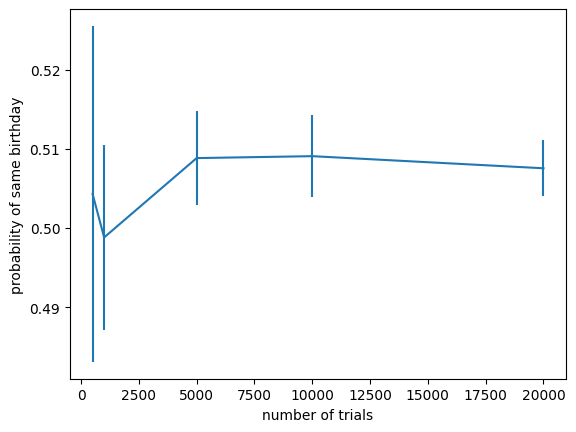

In [16]:
## Helpful functions: np.mean,np.var,plt.plot,plt.errorbar


## Start your code here
n_trials=[500,1000,5000,10000,20000]
n_reps=100
n_people=23

probabilites=np.empty((len(n_trials),n_reps))

#use multiprocess to be faster ;)
pool=Pool(os.cpu_count())
for i,n_trial in enumerate(n_trials):
    val=pool.starmap(estimate_p_aloc, n_reps*[(n_trial,n_people)])
    probabilites[i,:]=val

#ploting
plt.errorbar(n_trials,np.mean(probabilites,axis=1),yerr=np.std(probabilites,axis=1))
plt.ylabel("probability of same birthday")
plt.xlabel("number of trials")
## End your code here


## Generate a plot of P(having at least one coincidence) as a function of the number of people: Sweep the number of people from 2 to 60 in increments of 1 and for a given number of people repeat the simulation 10 times (each simulation with 10,000 trials) to get 10 probability estimates of having at least one coincidence and record the mean and variance of these 10 probability estimates. Plot the mean of the probability estimates as a function of the number of people with the variance of the probability estimates displayed as an error bar in the plot.


Text(0.5, 0, 'n_people')

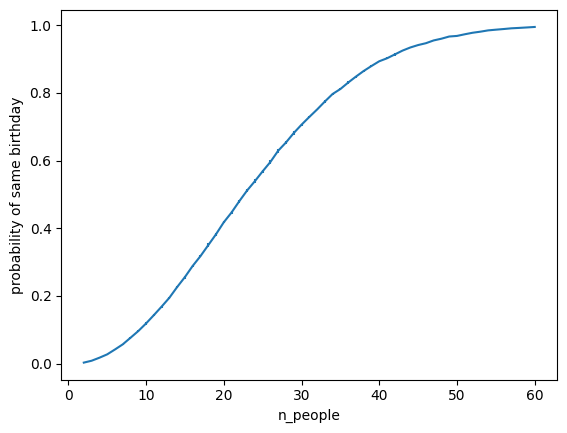

In [17]:
## Helpful functions: np.mean,np.var,plt.plot,plt.errorbar


## Start your code here

n_people=np.arange(2,61)
n_reps=10
probabilies=np.empty((len(n_people),n_reps))

for i,n in enumerate(n_people):
    val=pool.starmap(estimate_p_aloc, n_reps*[(10000,n)])
    probabilies[i,:]=val
pool.close()

#ploting
plt.errorbar(n_people,np.mean(probabilies,axis=1),yerr=np.std(probabilies,axis=1))
plt.ylabel("probability of same birthday")
plt.xlabel("n_people")

## End your code here
